In [1]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik stili ayarları
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Veri setini yükle
df = pd.read_csv("Fraud.csv")

# Veri setinin ilk 5 satırını görüntüle
print("Veri setinin ilk 5 satırı:")
print(df.head())

# Veri setinin genel bilgileri
print("\nVeri setinin genel bilgileri:")
print(df.info())

# Veri setindeki eksik değerleri kontrol et
print("\nEksik değer analizi:")
print(df.isnull().sum())

# Temel istatistiksel özet
print("\nVeri setinin istatistiksel özeti:")
print(df.describe())

# Sütunlardaki benzersiz değerleri incele
print("\nBenzersiz değerler:")
print(df.nunique())


Veri setinin ilk 5 satırı:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  

Veri setinin genel bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [2]:
# İşlem türlerine göre veri dağılımı
print("\nİşlem türlerine göre dağılım:")
print(df['type'].value_counts())




İşlem türlerine göre dağılım:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


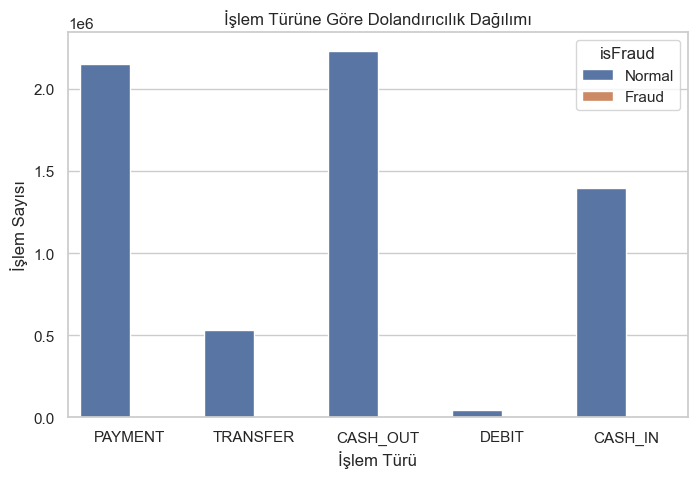

In [3]:
# İşlem türü ve dolandırıcılık arasındaki ilişkiyi görselleştir
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title("İşlem Türüne Göre Dolandırıcılık Dağılımı")
plt.xlabel("İşlem Türü")
plt.ylabel("İşlem Sayısı")
plt.legend(title="isFraud", labels=["Normal", "Fraud"])
plt.show()



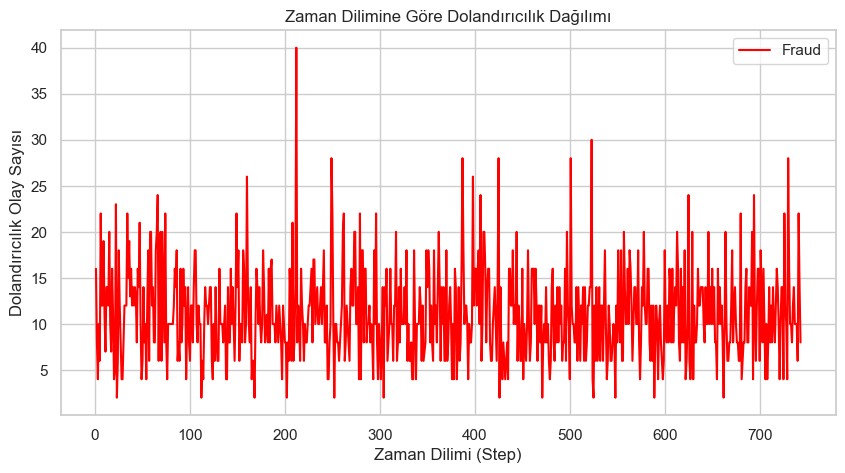

In [4]:
# Zaman dilimine (step) göre dolandırıcılık olaylarını incele
fraud_by_step = df[df['isFraud'] == 1].groupby('step')['isFraud'].count()
plt.figure(figsize=(10, 5))
fraud_by_step.plot(kind='line', color='red', label='Fraud')
plt.title("Zaman Dilimine Göre Dolandırıcılık Dağılımı")
plt.xlabel("Zaman Dilimi (Step)")
plt.ylabel("Dolandırıcılık Olay Sayısı")
plt.legend()
plt.show()



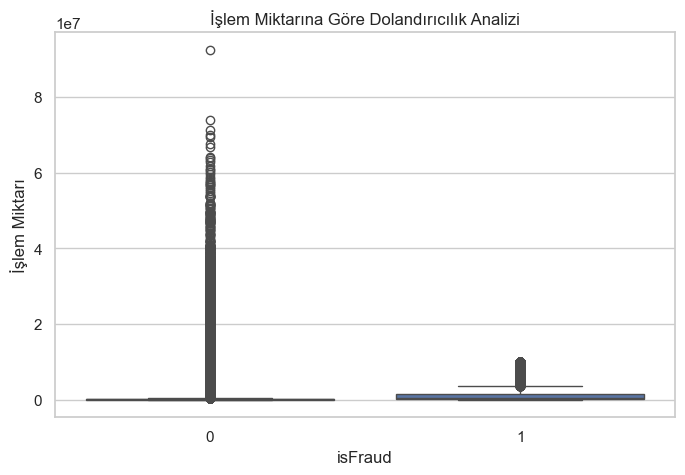

In [5]:
# İşlem miktarı ve dolandırıcılık ilişkisinin görselleştirilmesi
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title("İşlem Miktarına Göre Dolandırıcılık Analizi")
plt.xlabel("isFraud")
plt.ylabel("İşlem Miktarı")
plt.show()



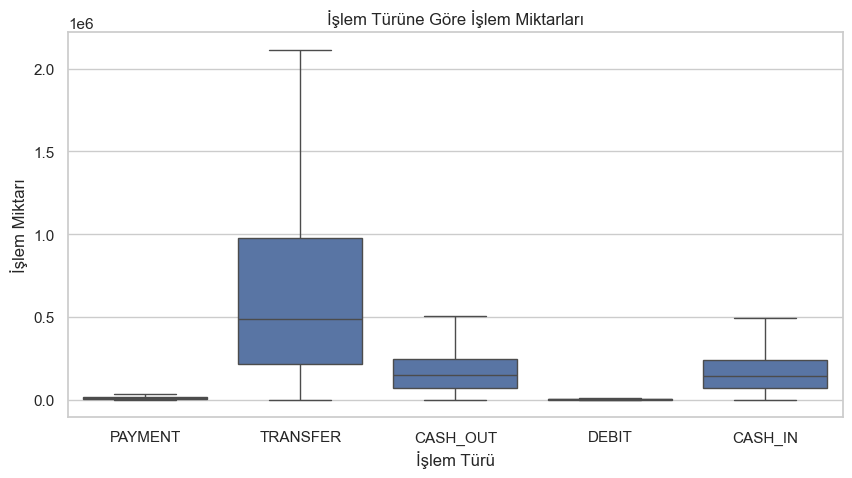

In [6]:
# İşlem türüne göre miktarların dağılımı
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='type', y='amount', showfliers=False)
plt.title("İşlem Türüne Göre İşlem Miktarları")
plt.xlabel("İşlem Türü")
plt.ylabel("İşlem Miktarı")
plt.show()



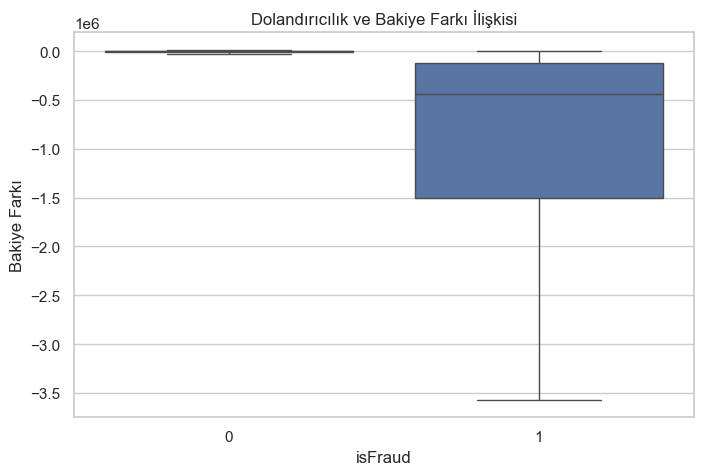

In [7]:
# Oldbalance ve Newbalance arasındaki farkı ekle
df['balance_diff'] = df['newbalanceOrig'] - df['oldbalanceOrg']

# Dolandırıcılık ve balance farkı ilişkisi
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='isFraud', y='balance_diff', showfliers=False)
plt.title("Dolandırıcılık ve Bakiye Farkı İlişkisi")
plt.xlabel("isFraud")
plt.ylabel("Bakiye Farkı")
plt.show()



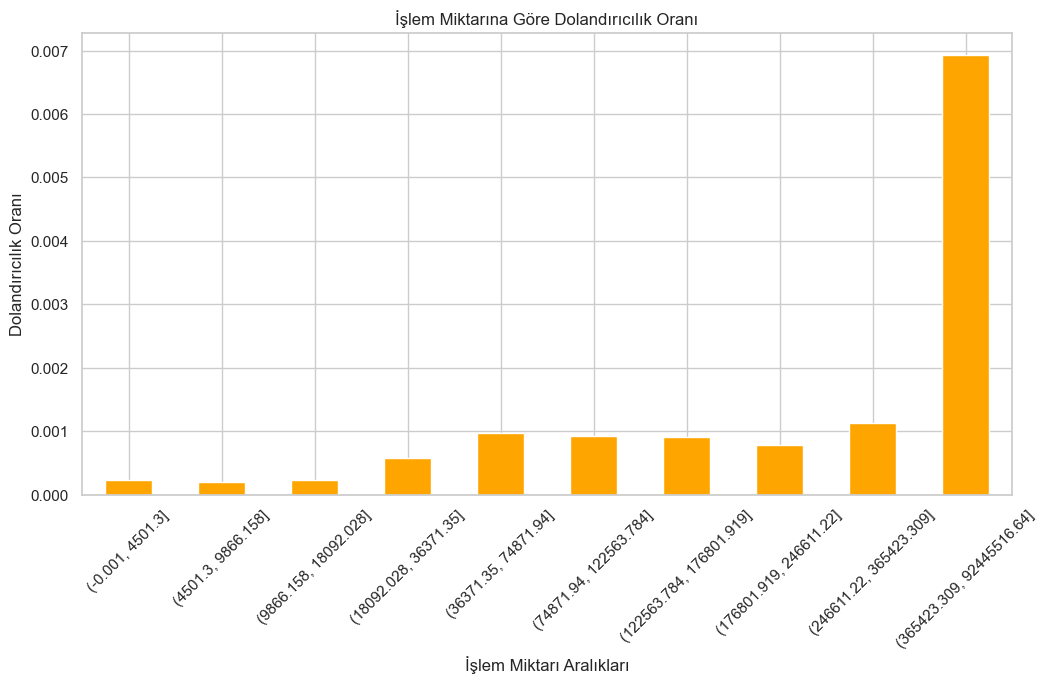

In [8]:
# İşlem tutarına bağlı dolandırıcılık oranı
df['amount_bins'] = pd.qcut(df['amount'], q=10, duplicates='drop')
fraud_rate = df.groupby('amount_bins', observed=False)['isFraud'].mean()
plt.figure(figsize=(12, 6))
fraud_rate.plot(kind='bar', color='orange')
plt.title("İşlem Miktarına Göre Dolandırıcılık Oranı")
plt.xlabel("İşlem Miktarı Aralıkları")
plt.ylabel("Dolandırıcılık Oranı")
plt.xticks(rotation=45)
plt.show()

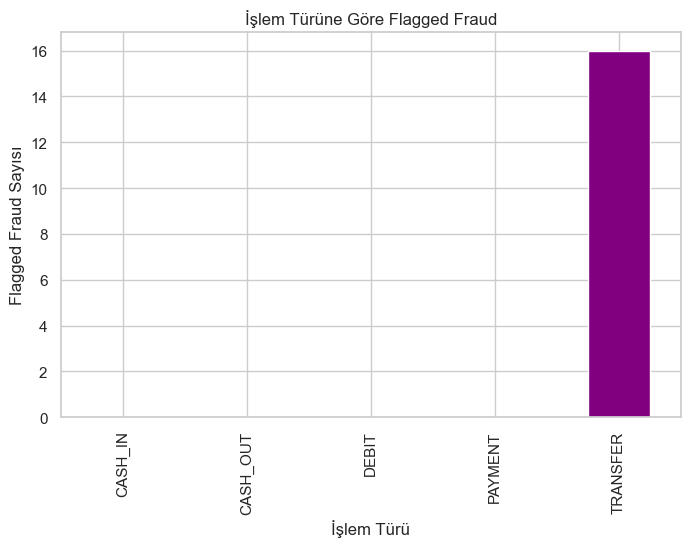

In [9]:
# İşlem türüne göre flaggedFraud analizi
flagged_analysis = df.groupby('type')['isFlaggedFraud'].sum()
plt.figure(figsize=(8, 5))
flagged_analysis.plot(kind='bar', color='purple')
plt.title("İşlem Türüne Göre Flagged Fraud")
plt.xlabel("İşlem Türü")
plt.ylabel("Flagged Fraud Sayısı")
plt.show()

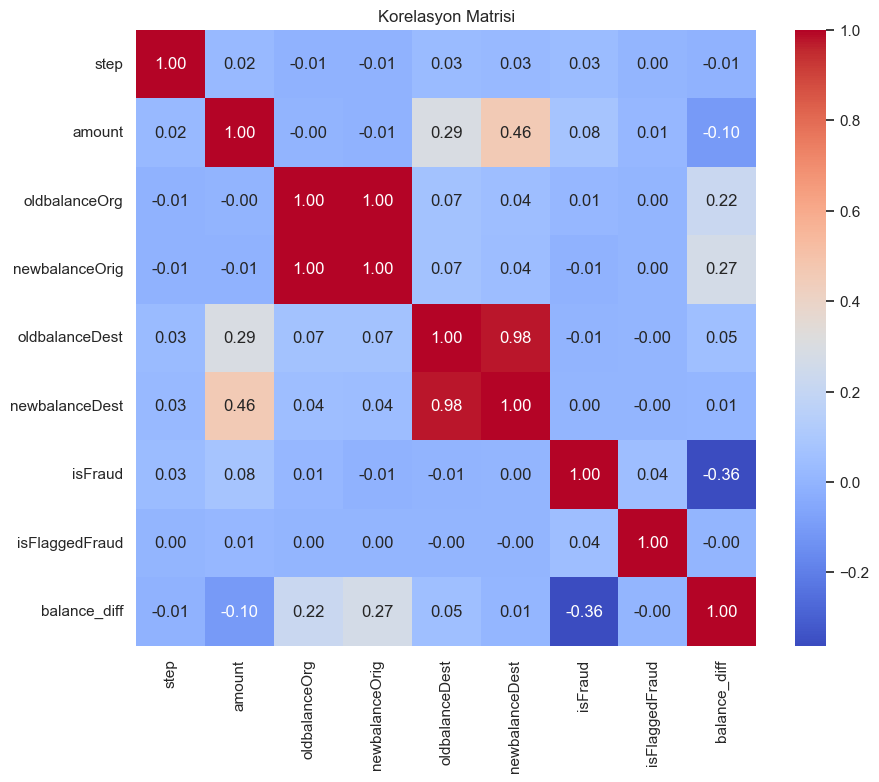

In [10]:
# Veri setindeki korelasyon matrisini incele
numeric_cols = df.select_dtypes(include=['number'])
corr = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasyon Matrisi")
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Veriyi yükleme
file_path = 'Fraud.csv'  # Dosya yolu
fraud_data = pd.read_csv(file_path)

# Veriyi %80 eğitim ve %20 test olarak bölme
train_data, test_data = train_test_split(fraud_data, test_size=0.2, random_state=42)

# Eğitim verisini isFraud sütununa göre ayırma
is_fraud_data = train_data[train_data['isFraud'] == 1].copy()
is_not_fraud_data = train_data[train_data['isFraud'] == 0].copy()

# is_fraud_data'dan KMeans ile 15 veri seçimi
kmeans_fraud = KMeans(n_clusters=15, random_state=42)
is_fraud_data_numeric = is_fraud_data.select_dtypes(include=['number'])  # Sayısal sütunları seç
kmeans_fraud.fit(is_fraud_data_numeric)
is_fraud_data.loc[:, 'cluster'] = kmeans_fraud.labels_
representative_is_fraud_data = is_fraud_data.groupby('cluster').first().reset_index()

# is_not_fraud_data'dan KMeans ile 15 veri seçimi
kmeans_not_fraud = KMeans(n_clusters=15, random_state=42)
is_not_fraud_data_numeric = is_not_fraud_data.select_dtypes(include=['number'])  # Sayısal sütunları seç
kmeans_not_fraud.fit(is_not_fraud_data_numeric)
is_not_fraud_data.loc[:, 'cluster'] = kmeans_not_fraud.labels_
representative_is_not_fraud_data = is_not_fraud_data.groupby('cluster').first().reset_index()

# Seçilen verileri kaydetme
representative_is_fraud_data.to_csv('KmeansisFraud15.csv', index=False)
representative_is_not_fraud_data.to_csv('KmeanisNotFraud15.csv', index=False)

print("Veriler başarıyla seçildi ve ilgili dosyalara kaydedildi.")


Veriler başarıyla seçildi ve ilgili dosyalara kaydedildi.


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Veriyi yükleme
file_path = 'Fraud.csv'  # Dosya yolu
fraud_data = pd.read_csv(file_path)

# Veriyi %80 eğitim ve %20 test olarak bölme
train_data, test_data = train_test_split(fraud_data, test_size=0.2, random_state=42)

# Eğitim verisini isFraud sütununa göre ayırma
is_fraud_data = train_data[train_data['isFraud'] == 1].copy()
is_not_fraud_data = train_data[train_data['isFraud'] == 0].copy()

# Rastgele 15'er veri seçme
representative_is_fraud_data = is_fraud_data.sample(n=15, random_state=42)
representative_is_not_fraud_data = is_not_fraud_data.sample(n=15, random_state=42)

# Seçilen verileri kaydetme
representative_is_fraud_data.to_csv('RandomisFraud15.csv', index=False)
representative_is_not_fraud_data.to_csv('RandomisNotFraud15.csv', index=False)

print("Veriler rastgele seçildi ve ilgili dosyalara kaydedildi.")


Veriler rastgele seçildi ve ilgili dosyalara kaydedildi.


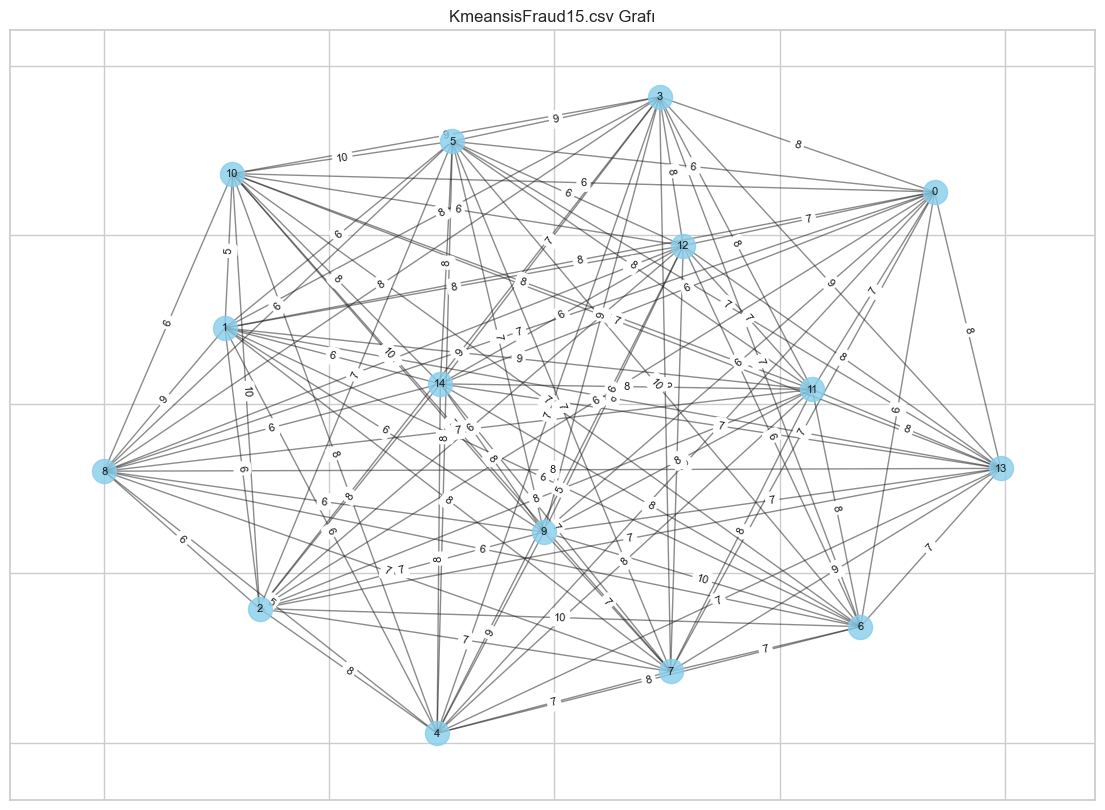

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Veri setini yükleme
file_path = 'KmeansisFraud15.csv'
data = pd.read_csv(file_path)

# Graf yapısını oluşturma
G = nx.Graph()

# Düğümleri ekleme
for idx, row in data.iterrows():
    G.add_node(idx, **row.to_dict())

# Benzerlik kontrolü için sütunlar
columns_to_compare = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

# Kenarları ekleme
for i in range(len(data)):
    for j in range(i + 1, len(data)):
        similarity_count = 0
        for col in columns_to_compare:
            if col == 'type':
                if data.loc[i, col] == data.loc[j, col]:
                    similarity_count += 1
            else:
                if abs(data.loc[i, col] - data.loc[j, col]) <= 1e6:
                    similarity_count += 1
        
        # Yeni koşulları kontrol etme
        # 'amount' değeri 133632.24'ten büyük mü küçük mü?
        if abs(data.loc[i, 'amount'] - data.loc[j, 'amount']) > 133632.24:
            similarity_count += 1
        
        # 'oldbalanceOrg' ve 'newbalanceOrig' farkı 133632.24'ten büyük mü küçük mü?
        if abs((data.loc[i, 'oldbalanceOrg'] - data.loc[i, 'newbalanceOrig']) - 
               (data.loc[j, 'oldbalanceOrg'] - data.loc[j, 'newbalanceOrig'])) > 133632.24:
            similarity_count += 1
        
        # 'oldbalanceDest' ve 'newbalanceDest' farkı 133632.24'ten büyük mü küçük mü?
        if abs((data.loc[i, 'oldbalanceDest'] - data.loc[i, 'newbalanceDest']) - 
               (data.loc[j, 'oldbalanceDest'] - data.loc[j, 'newbalanceDest'])) > 133632.24:
            similarity_count += 1

        # Eğer benzerlik varsa kenar ekle
        if similarity_count > 0:
            G.add_edge(i, j, weight=similarity_count)

# Grafı görselleştirme
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="skyblue", alpha=0.8)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.5)
edge_labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("KmeansisFraud15.csv Grafı")
plt.show()


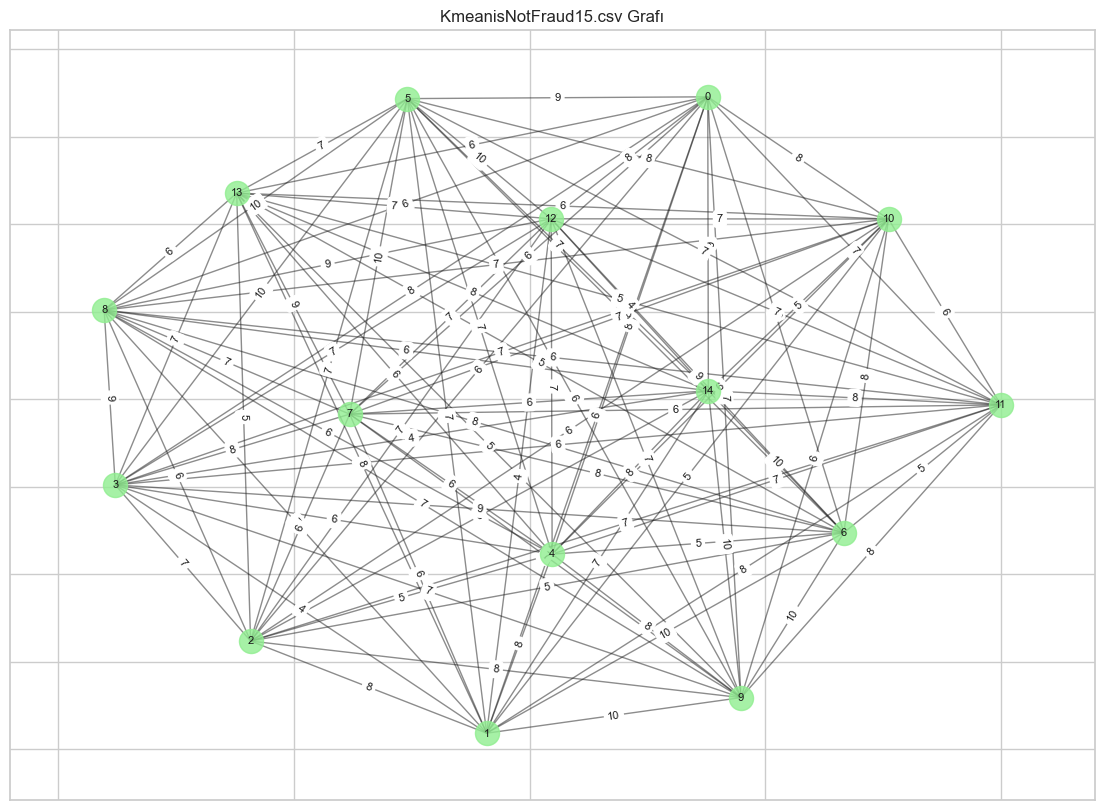

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Veri setini yükleme
file_path = 'KmeanisNotFraud15.csv'
data = pd.read_csv(file_path)

# Graf yapısını oluşturma
G = nx.Graph()

# Düğümleri ekleme
for idx, row in data.iterrows():
    G.add_node(idx, **row.to_dict())

# Benzerlik kontrolü için sütunlar
columns_to_compare = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

# Kenarları ekleme
for i in range(len(data)):
    for j in range(i + 1, len(data)):
        similarity_count = 0
        for col in columns_to_compare:
            if col == 'type':
                if data.loc[i, col] == data.loc[j, col]:
                    similarity_count += 1
            else:
                if abs(data.loc[i, col] - data.loc[j, col]) <= 1e6:
                    similarity_count += 1
        
        # Yeni koşulları kontrol etme
        # 'amount' değeri 133632.24'ten büyük mü küçük mü?
        if abs(data.loc[i, 'amount'] - data.loc[j, 'amount']) > 133632.24:
            similarity_count += 1
        
        # 'oldbalanceOrg' ve 'newbalanceOrig' farkı 133632.24'ten büyük mü küçük mü?
        if abs((data.loc[i, 'oldbalanceOrg'] - data.loc[i, 'newbalanceOrig']) - 
               (data.loc[j, 'oldbalanceOrg'] - data.loc[j, 'newbalanceOrig'])) > 133632.24:
            similarity_count += 1
        
        # 'oldbalanceDest' ve 'newbalanceDest' farkı 133632.24'ten büyük mü küçük mü?
        if abs((data.loc[i, 'oldbalanceDest'] - data.loc[i, 'newbalanceDest']) - 
               (data.loc[j, 'oldbalanceDest'] - data.loc[j, 'newbalanceDest'])) > 133632.24:
            similarity_count += 1

        # Eğer benzerlik varsa kenar ekle
        if similarity_count > 0:
            G.add_edge(i, j, weight=similarity_count)

# Grafı görselleştirme
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="lightgreen", alpha=0.8)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.5)
edge_labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("KmeanisNotFraud15.csv Grafı")
plt.show()


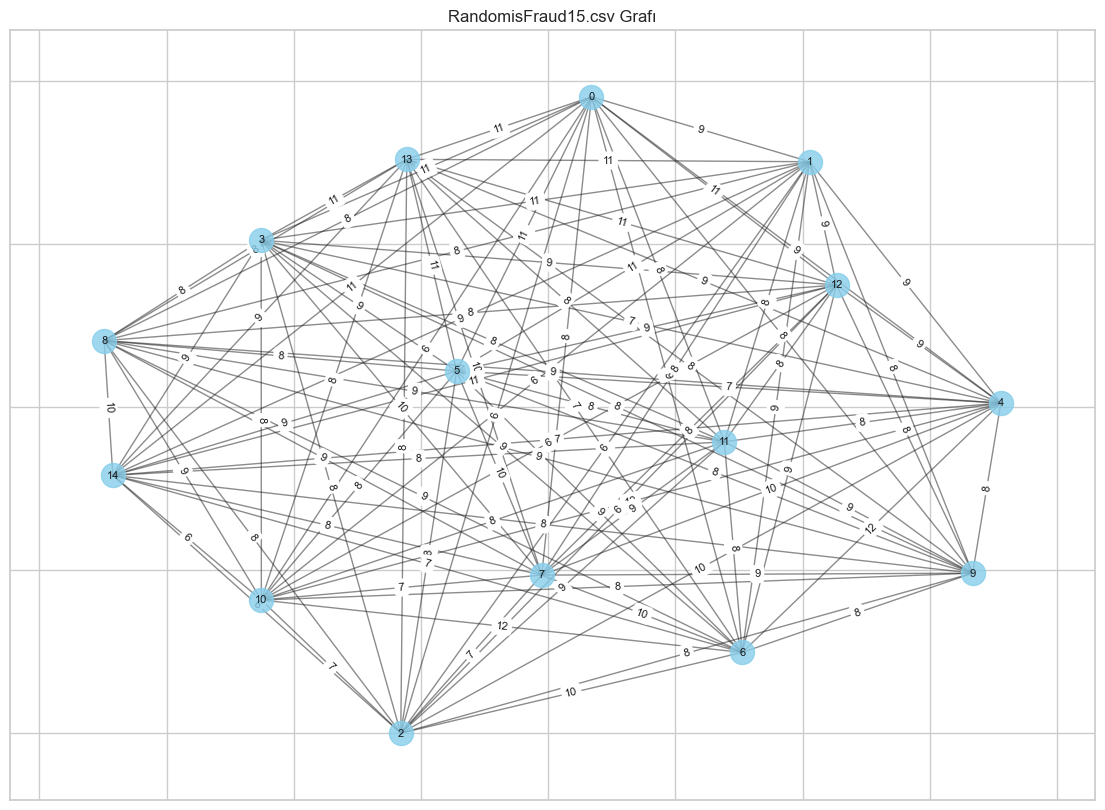

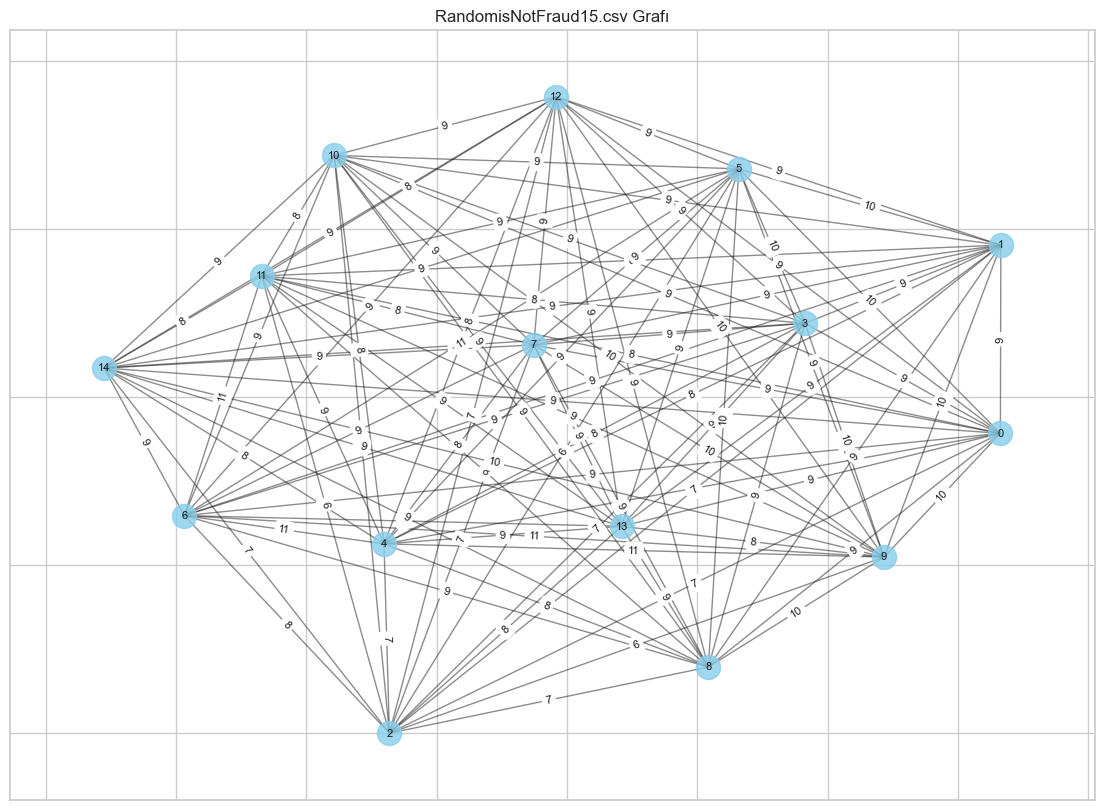

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def create_and_visualize_graph(file_path, title):
    # Veri setini yükleme
    data = pd.read_csv(file_path)

    # Graf yapısını oluşturma
    G = nx.Graph()

    # Düğümleri ekleme
    for idx, row in data.iterrows():
        G.add_node(idx, **row.to_dict())

    # Benzerlik kontrolü için sütunlar
    columns_to_compare = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

    # Kenarları ekleme
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            similarity_count = 0
            for col in columns_to_compare:
                if col == 'type':
                    if data.loc[i, col] == data.loc[j, col]:
                        similarity_count += 1
                else:
                    if abs(data.loc[i, col] - data.loc[j, col]) <= 1e6:
                        similarity_count += 1
            
            # Yeni koşulları kontrol etme
            if abs(data.loc[i, 'amount'] - data.loc[j, 'amount']) > 133632.24:
                similarity_count += 1
            
            if abs((data.loc[i, 'oldbalanceOrg'] - data.loc[i, 'newbalanceOrig']) - 
                   (data.loc[j, 'oldbalanceOrg'] - data.loc[j, 'newbalanceOrig'])) > 133632.24:
                similarity_count += 1
            
            if abs((data.loc[i, 'oldbalanceDest'] - data.loc[i, 'newbalanceDest']) - 
                   (data.loc[j, 'oldbalanceDest'] - data.loc[j, 'newbalanceDest'])) > 133632.24:
                similarity_count += 1

            # Eğer benzerlik varsa kenar ekle
            if similarity_count > 0:
                G.add_edge(i, j, weight=similarity_count)

    # Grafı görselleştirme
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color="skyblue", alpha=0.8)
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.5)
    edge_labels = {(u, v): d['weight'] for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title(title)
    plt.show()

# Farklı veri setleri için graf oluşturma
file_paths = ['RandomisFraud15.csv', 'RandomisNotFraud15.csv']
titles = ['RandomisFraud15.csv Grafı', 'RandomisNotFraud15.csv Grafı']

for file_path, title in zip(file_paths, titles):
    create_and_visualize_graph(file_path, title)


In [ ]:
import pandas as pd
import networkx as nx
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Malatya Centrality Hesaplama
def malatya_centrality(G):
    centrality_values = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        if neighbors:
            node_degree = G.degree[node]
            neighbor_degrees = sum(G.degree[neighbor] for neighbor in neighbors)
            centrality_values[node] = node_degree / neighbor_degrees if neighbor_degrees > 0 else 0
        else:
            centrality_values[node] = 0
    return centrality_values

# Test verisini tahmin etme
def predict_is_fraud(test_data, graph_fraud, graph_not_fraud, columns_to_compare):
    predictions = []
    for _, row in test_data.iterrows():
        # Test verisini düğüm olarak hazırla
        new_node = len(graph_fraud.nodes)
        row_data = row.to_dict()

        # KmeansisFraud15.csv grafına ekle ve Malatya Merkezlilik hesapla
        graph_fraud.add_node(new_node, **row_data)
        for node in graph_fraud.nodes:
            if node != new_node:
                similarity_count = sum(
                    abs(row[col] - graph_fraud.nodes[node].get(col, 0)) <= 1e6 if col != 'type'
                    else row[col] == graph_fraud.nodes[node].get(col)
                    for col in columns_to_compare
                )
                if similarity_count > 0:
                    graph_fraud.add_edge(new_node, node, weight=similarity_count)

        fraud_centrality = sum(malatya_centrality(graph_fraud).values())
        
        # KmeanisNotFraud15.csv grafına ekle ve Malatya Merkezlilik hesapla
        graph_not_fraud.add_node(new_node, **row_data)
        for node in graph_not_fraud.nodes:
            if node != new_node:
                similarity_count = sum(
                    abs(row[col] - graph_not_fraud.nodes[node].get(col, 0)) <= 1e6 if col != 'type'
                    else row[col] == graph_not_fraud.nodes[node].get(col)
                    for col in columns_to_compare
                )
                if similarity_count > 0:
                    graph_not_fraud.add_edge(new_node, node, weight=similarity_count)

        not_fraud_centrality = sum(malatya_centrality(graph_not_fraud).values())

        # Tahmin yap
        if fraud_centrality > not_fraud_centrality:
            predictions.append(1)
        else:
            predictions.append(0)

        # Düğümü grafikten çıkar
        graph_fraud.remove_node(new_node)
        graph_not_fraud.remove_node(new_node)

    return predictions

# Veri yükleme
fraud_data = pd.read_csv('Fraud.csv')
train_data, test_data = train_test_split(fraud_data, test_size=0.2, random_state=42)

# Eğitim setlerini yükleme
fraud_graph = nx.Graph()
not_fraud_graph = nx.Graph()

fraud_train = pd.read_csv('KmeansisFraud15.csv')
not_fraud_train = pd.read_csv('KmeanisNotFraud15.csv')

# Eğitim grafı düğümleri ekleme
for idx, row in fraud_train.iterrows():
    fraud_graph.add_node(idx, **row.to_dict())

for idx, row in not_fraud_train.iterrows():
    not_fraud_graph.add_node(idx, **row.to_dict())

# Tahmin sütunları
columns_to_compare = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

# Test verisi için tahmin
predicted = predict_is_fraud(test_data, fraud_graph, not_fraud_graph, columns_to_compare)

# Performans ölçümü
true_labels = test_data['isFraud']
accuracy = accuracy_score(true_labels, predicted)
precision = precision_score(true_labels, predicted)
recall = recall_score(true_labels, predicted)
f1 = f1_score(true_labels, predicted)
cm = confusion_matrix(true_labels, predicted)
tn, fp, fn, tp = cm.ravel()

# Sonuçları yazdırma
print("Model Performansı:")
print("------------------")
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Duyarlılık (Recall): {recall:.4f}")
print(f"F1 Skoru: {f1:.4f}")
print("\nKarışıklık Matrisi (Confusion Matrix):")
print(cm)
print(f"\nDetaylı Dağılım:")
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"True Negative (TN): {tn}")
print(f"False Negative (FN): {fn}")
print("\nClassification Report:")
print(classification_report(true_labels, predicted))


In [ ]:
import pandas as pd
import networkx as nx
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Malatya Centrality Hesaplama
def malatya_centrality(G):
    centrality_values = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        if neighbors:
            node_degree = G.degree[node]
            neighbor_degrees = sum(G.degree[neighbor] for neighbor in neighbors)
            centrality_values[node] = node_degree / neighbor_degrees if neighbor_degrees > 0 else 0
        else:
            centrality_values[node] = 0
    return centrality_values

# Test verisini tahmin etme
def predict_is_fraud(test_data, graph_fraud, graph_not_fraud, columns_to_compare):
    predictions = []
    for _, row in test_data.iterrows():
        # Test verisini düğüm olarak hazırla
        new_node = len(graph_fraud.nodes)
        row_data = row.to_dict()

        # RandomisFraud15.csv grafına ekle ve Malatya Merkezlilik hesapla
        graph_fraud.add_node(new_node, **row_data)
        for node in graph_fraud.nodes:
            if node != new_node:
                similarity_count = sum(
                    abs(row[col] - graph_fraud.nodes[node].get(col, 0)) <= 1e6 if col != 'type'
                    else row[col] == graph_fraud.nodes[node].get(col)
                    for col in columns_to_compare
                )
                if similarity_count > 0:
                    graph_fraud.add_edge(new_node, node, weight=similarity_count)

        fraud_centrality = sum(malatya_centrality(graph_fraud).values())
        
        # RandomisNotFraud15.csv grafına ekle ve Malatya Merkezlilik hesapla
        graph_not_fraud.add_node(new_node, **row_data)
        for node in graph_not_fraud.nodes:
            if node != new_node:
                similarity_count = sum(
                    abs(row[col] - graph_not_fraud.nodes[node].get(col, 0)) <= 1e6 if col != 'type'
                    else row[col] == graph_not_fraud.nodes[node].get(col)
                    for col in columns_to_compare
                )
                if similarity_count > 0:
                    graph_not_fraud.add_edge(new_node, node, weight=similarity_count)

        not_fraud_centrality = sum(malatya_centrality(graph_not_fraud).values())

        # Tahmin yap
        if fraud_centrality > not_fraud_centrality:
            predictions.append(1)
        else:
            predictions.append(0)

        # Düğümü grafikten çıkar
        graph_fraud.remove_node(new_node)
        graph_not_fraud.remove_node(new_node)

    return predictions

# Veri yükleme
fraud_data = pd.read_csv('Fraud.csv')
train_data, test_data = train_test_split(fraud_data, test_size=0.2, random_state=42)

# Eğitim setlerini yükleme
fraud_graph = nx.Graph()
not_fraud_graph = nx.Graph()

fraud_train = pd.read_csv('RandomisFraud15.csv')  # RandomisFraud15.csv
not_fraud_train = pd.read_csv('RandomisNotFraud15.csv')  # RandomisNotFraud15.csv

# Eğitim grafı düğümleri ekleme
for idx, row in fraud_train.iterrows():
    fraud_graph.add_node(idx, **row.to_dict())

for idx, row in not_fraud_train.iterrows():
    not_fraud_graph.add_node(idx, **row.to_dict())

# Tahmin sütunları
columns_to_compare = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

# Test verisi için tahmin
predicted = predict_is_fraud(test_data, fraud_graph, not_fraud_graph, columns_to_compare)

# Performans ölçümü
true_labels = test_data['isFraud']
accuracy = accuracy_score(true_labels, predicted)
precision = precision_score(true_labels, predicted)
recall = recall_score(true_labels, predicted)
f1 = f1_score(true_labels, predicted)
cm = confusion_matrix(true_labels, predicted)
tn, fp, fn, tp = cm.ravel()

# Sonuçları yazdırma
print("Model Performansı:")
print("------------------")
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Duyarlılık (Recall): {recall:.4f}")
print(f"F1 Skoru: {f1:.4f}")
print("\nKarışıklık Matrisi (Confusion Matrix):")
print(cm)
print(f"\nDetaylı Dağılım:")
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"True Negative (TN): {tn}")
print(f"False Negative (FN): {fn}")
print("\nClassification Report:")
print(classification_report(true_labels, predicted))


In [ ]:
# Son iki kodumun çalışması bilgisayarımda ek olarak birşeyler çalışmamamsına rağmen toplamda 29 saat sürdü.